<a href="https://colab.research.google.com/github/Omorusi/Neural-network/blob/main/Basic_ANN(Copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# We have to import the necessary modules from Keras:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np

In [45]:

np.random.seed(7)

In [46]:
dataset = np.loadtxt("/content/pima-indians-diabetes.data.csv", delimiter=",")

dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [47]:

X = dataset[:,0:8] # Selects columns 0 to 7 (features)
Y = dataset[:,8] # Selects column 8 (target)

In [48]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(X, Y, epochs=150, batch_size=4)

Epoch 1/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4703 - loss: 4.7040
Epoch 2/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5134 - loss: 1.8411
Epoch 3/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5323 - loss: 1.1618
Epoch 4/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5623 - loss: 1.0954
Epoch 5/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6274 - loss: 0.8731
Epoch 6/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5942 - loss: 0.7995
Epoch 7/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6135 - loss: 0.7434
Epoch 8/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6551 - loss: 0.6949
Epoch 9/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6363 - loss: 0.7175
Epoch 10/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6732 - loss: 0.6394
Epoch 11/150
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - loss: 0.6755
Epoch 12/150
192/192 ━━━━━━━━━━━━━━━━━━━━

In [51]:

...
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7345 - loss: 0.5409
Accuracy: 75.13


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5827 - loss: 0.7174 - val_accuracy: 0.6429 - val_loss: 0.6756
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6187 - loss: 0.6728 - val_accuracy: 0.6429 - val_loss: 0.6568
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6289 - loss: 0.6671 - val_accuracy: 0.6429 - val_loss: 0.6581
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6866 - loss: 0.6061 - val_accuracy: 0.6429 - val_loss: 0.6550
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6319 - loss: 0.6446 - val_accuracy: 0.6494 - val_loss: 0.6565
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6752 - loss: 0.6328 - val_accuracy: 0.6429 - val_loss: 0.6584
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6349 - loss: 0.6819 - val_accuracy: 0.6429 - val_loss: 0.6538
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6651 - loss: 0.6357 - val_accuracy: 0.6429 - 

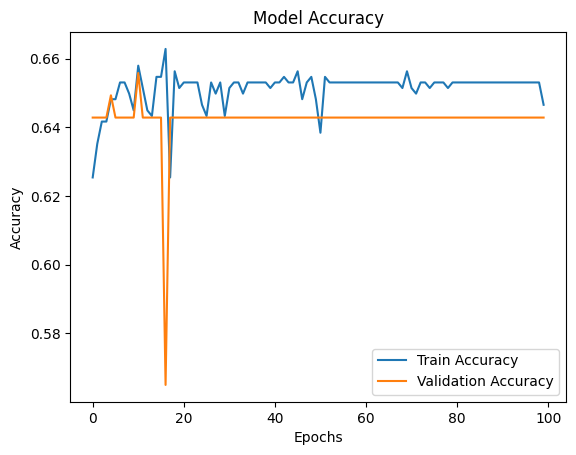

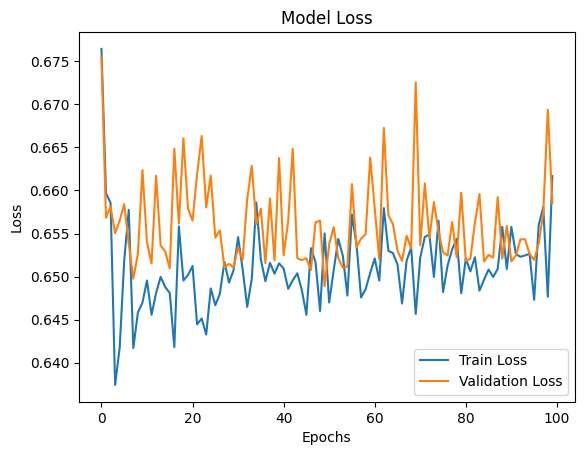

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6242 - loss: 0.6738

Final Model Accuracy: 65.10%


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Set seed for reproducibility
np.random.seed(7)

# Load dataset (replace with your actual dataset)
dataset = np.loadtxt("/content/pima-indians-diabetes.data.csv", delimiter=",")
X = dataset[:, 0:8]  # Features (Modify accordingly)
Y = dataset[:, 8]    # Target (0 or 1)

# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))  # First hidden layer with more neurons
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model and store history
history = model.fit(X, Y, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
eval_results = model.evaluate(X, Y)
print(f"\nFinal Model Accuracy: {eval_results[1] * 100:.2f}%")


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6678 - loss: 0.6535 - val_accuracy: 0.6429 - val_loss: 0.6347
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6218 - loss: 0.6371 - val_accuracy: 0.6429 - val_loss: 0.6189
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.6001 - val_accuracy: 0.6364 - val_loss: 0.6206
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6316 - loss: 0.6305 - val_accuracy: 0.6494 - val_loss: 0.6598
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 0.6496 - val_accuracy: 0.6429 - val_loss: 0.6440
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.6241 - val_accuracy: 0.6429 - val_loss: 0.6524
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6224 - loss: 0.6331 - val_accuracy: 0.6429 - val_loss: 0.6304
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6372 - loss: 0.6357 - val_accuracy: 0.6429 - v

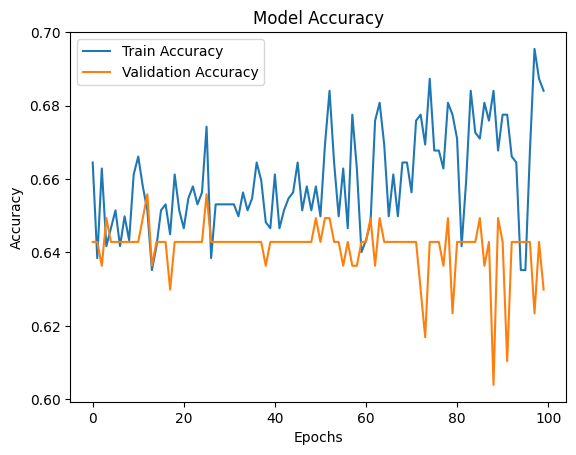

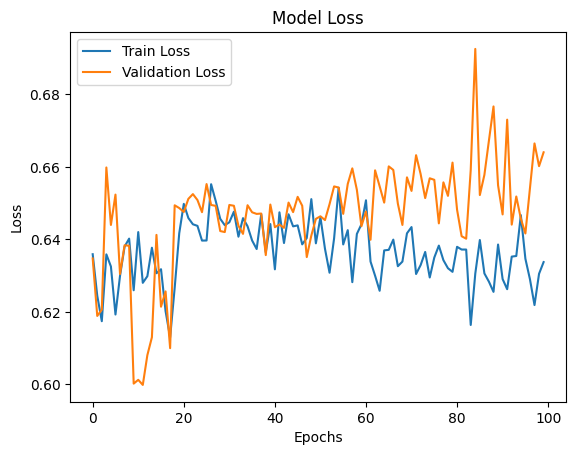

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - loss: 0.6441 

Final Model Accuracy: 66.67%


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Set seed for reproducibility
np.random.seed(7)

# Load dataset (replace with your actual dataset)
dataset = np.loadtxt("/content/pima-indians-diabetes.data.csv", delimiter=",")
X = dataset[:, 0:8]  # Features (Modify accordingly)
Y = dataset[:, 8]    # Target (0 or 1)

# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='sigmoid'))  # First hidden layer with more neurons
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model and store history
history = model.fit(X, Y, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
eval_results = model.evaluate(X, Y)
print(f"\nFinal Model Accuracy: {eval_results[1] * 100:.2f}%")


In [54]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/dataset (1).csv")

# Display basic info and the first few rows
#df.info(), df.head()

In [55]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['target']).values
y = data['target'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4793 - loss: 0.7223 - val_accuracy: 0.6230 - val_loss: 0.6412
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6633 - loss: 0.6357 - val_accuracy: 0.7213 - val_loss: 0.5735
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.5735 - val_accuracy: 0.7869 - val_loss: 0.5195
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7604 - loss: 0.5212 - val_accuracy: 0.8033 - val_loss: 0.4772
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8005 - loss: 0.4664 - val_accuracy: 0.8197 - val_loss: 0.4447
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.4297 - val_accuracy: 0.8197 - val_loss: 0.4240
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.4129 - val_accuracy: 0.8361 - val_loss: 0.4087
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.4104 - val_accuracy: 0.8525 - val_loss: 0.3978
Ep

(0.44335031509399414, 0.8524590134620667)

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://github.com/dcavar/python-tutorial-notebooks/blob/master/notebooks/Neural%20Network%20Example%20with%20Keras.ipynb

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import pandas as pd

In [58]:
data = pd.read_csv("/content/dataset (1).csv")

In [59]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
np.random.seed(7)

In [61]:
# All columns except target
X =  data.drop(columns=['target'])

# Target column
Y = data['target']



In [65]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model.fit(X, Y, epochs=150, batch_size=4)

Epoch 1/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5313 - loss: 16.5171
Epoch 2/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6416 - loss: 1.0195
Epoch 3/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7029 - loss: 0.9048
Epoch 4/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.9541
Epoch 5/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.9209
Epoch 6/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - loss: 0.7900
Epoch 7/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.6566
Epoch 8/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6971 - loss: 0.7883
Epoch 9/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.6949
Epoch 10/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.5796
Epoch 11/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7113 - loss: 0.5754
Epoch 12/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [68]:
...
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7462 - loss: 0.4980  
Accuracy: 80.20


In [64]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6,activation = 'tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=150, batch_size=4)

Epoch 1/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4753 - loss: 0.7032
Epoch 2/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 0.6748
Epoch 3/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - loss: 0.6707
Epoch 4/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6199 - loss: 0.6733
Epoch 5/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - loss: 0.6667
Epoch 6/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5903 - loss: 0.6592
Epoch 7/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6898 - loss: 0.6271
Epoch 8/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6712 - loss: 0.6274
Epoch 9/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6713 - loss: 0.5980
Epoch 10/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6844 - loss: 0.6073
Epoch 11/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6469 - loss: 0.6141
Epoch 12/150
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy